<a href="https://colab.research.google.com/github/nagae/ICL_B_2021/blob/main/state_of_emergency.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 特定の期間について背景に色をつけたい
ある期間の背景の色を変更したい場合は， [`pyplot.axvspan()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axvspan.html)関数を使う．

In [1]:
# 必要なモジュールのインポート
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt, dates as mdates
import datetime
# ファイルを読み込み，列名を使いやすい形に修正
fname = 'https://toyokeizai.net/sp/visual/tko/covid19/csv/prefectures.csv'
jp_df = pd.read_csv(fname, dtype=str)
jp_df.columns = [ "年", "月", "日", "都道府県", "Pref", "陽性数", "検査数", "入院数", "重症数","退院数", "死亡数","実効再生産数"]
# 都道府県名以外の全てのセルを整数値に変換する
for c in jp_df.columns:
    if c in ["都道府県", "Pref"]: # 都道府県名のデータは文字型として扱う
        jp_df[c] = jp_df[c].astype(str)
    else:
        jp_df[c] = pd.to_numeric(jp_df[c], errors='coerce') # 都道府県名以外のデータは数値として扱う
        jp_df[c] = jp_df[c].fillna(0) # データが欠損している部分を0で埋める
        jp_df[c] = jp_df[c].astype(float) # 一旦は実数型に変換する 
        if c not in ["実効再生産数"]: # 実効再生産数以外のデータは整数型として扱う
            jp_df[c] = jp_df[c].astype(int)
# 年月日の列からdatetime型のインデックスを生成する
jp_df["年月日"] = pd.to_datetime(jp_df[["年", "月", "日"]].astype(str).agg('-'.join, axis=1), format='%Y-%m-%d')
# 都道府県名と年月日からなるマルチインデックスを構築
jp_df = jp_df.set_index(["都道府県", "年月日"])
jp_df # jp_df の概観を表示

,,年,月,日,Pref,陽性数,検査数,入院数,重症数,退院数,死亡数,実効再生産数
都道府県,年月日,,,,,,,,,,,
東京都,2020-02-08,2020,2,8,Tokyo,3,0,0,0,0,0,0.00
神奈川県,2020-02-08,2020,2,8,Kanagawa,1,0,0,0,0,0,0.00
東京都,2020-02-09,2020,2,9,Tokyo,3,0,0,0,0,0,0.00
神奈川県,2020-02-09,2020,2,9,Kanagawa,1,0,0,0,0,0,0.00
東京都,2020-02-10,2020,2,10,Tokyo,3,0,0,0,0,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
熊本県,2021-05-13,2021,5,13,Kumamoto,5024,70545,771,18,4169,84,1.74
大分県,2021-05-13,2021,5,13,Oita,2666,125684,749,5,1886,31,1.34
宮崎県,2021-05-13,2021,5,13,Miyazaki,2734,35688,479,5,2221,25,1.29


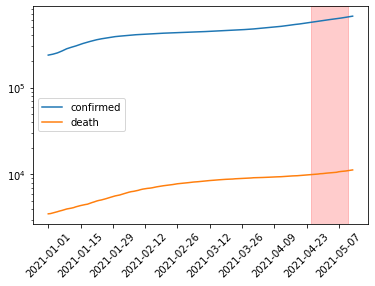

In [58]:
# 描画期間
start = datetime.datetime(2021,1,1) # 表示する期間の始め
end = jp_df.index[-1][1] # 表示する期間の終わり

# データを準備
total_conf = jp_df["陽性数"].groupby("年月日").sum()[start:end] # 全国の総陽性数
total_dead = jp_df["死亡数"].groupby("年月日").sum()[start:end] # 全国の総死亡数
plt.plot(total_conf, label="confirmed", zorder=10) # 折れ線グラフは手前に表示したいので zorder を大きめの値に
plt.plot(total_dead, label="death", zorder=11)

# x軸の見栄えを調製
plt.xticks(np.arange(start,end,np.timedelta64(14,'D')),rotation=45) # x軸の目盛を14日おきにし，45度傾ける
plt.yscale('log') # y軸を対数表示

# 緊急事態宣言期間を赤で塗り潰したものを表示
soe3_start = datetime.datetime(2021,4,25) # 3回目の緊急事態宣言の開始日
soe3_end = datetime.datetime(2021,5,11) # (宣言時に予定されていた)終了日
plt.axvspan(soe3_start, soe3_end, alpha=0.2, color='red', zorder=0) # 塗り潰しは奥に表示したいので zorder を0にする

# 凡例を表示
plt.legend()

# 特に要らないけどおまじない
plt.show()